In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
np.random.seed(3)
tf.set_random_seed(3)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Data Loading

In [293]:
train = pd.read_csv('../cs282-f17-xuefeng-yi-david/data/train_scaled_encoded.csv')

In [294]:
test = pd.read_csv('../cs282-f17-xuefeng-yi-david/data/test_scaled_encoded.csv')

In [4]:
# define an action mapping - how to get an id representing the action from the (iv, vaso) tuple
action_map = {}
count = 0
for iv in range(5):
    for vaso in range(5):
        action_map[(iv, vaso)] = count
        count += 1

In [5]:
def obser2traj(df):
    trajectory = []
    for i, obser in df.iterrows():
        if i + 1 == df.shape[0]:
            break
        if obser['icustayid'] == df.loc[i+1, 'icustayid']:
            next_s = df.iloc[i+1, :200]
            r = df.loc[i+1, 'reward']
            iv, vaso = obser['iv_input'], obser['vaso_input']
            a = action_map[ (iv, vaso) ]
            trajectory += [ obser[:200].tolist() + [a, r] + next_s.tolist() ]
    return np.array(trajectory)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,vaso_input,iv_input,reward,icustayid
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.083823,0.053838,0.081020,0.057297,0.030372,0.047363,0,0.0,0.0,12.0
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.088714,0.073047,0.083202,0.043883,0.036930,0.057726,0,0.0,0.0,12.0
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.092754,0.079161,0.082560,0.041910,0.036587,0.067986,0,0.0,0.0,12.0
3,0.042970,0.050963,0.090261,0.093201,0.031332,0.057674,0.032040,0.054802,0.061447,0.053960,...,0.098049,0.074196,0.088113,0.045784,0.041096,0.129189,0,0.0,15.0,12.0
4,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.032011,0.081824,0.037519,0.061251,0.071471,0.039540,0,4.0,0.0,14.0


In [7]:
train_trajectory = obser2traj(train)

In [8]:
test_trajectory = obser2traj(test)

In [9]:
pd.DataFrame(train_trajectory).head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.029027,0.061212,0.224086,0.079448,0.052524,0.077151,0.103817,0.063714,0.032102,0.042459,...,0.039969,0.095765,0.042694,0.056065,0.088714,0.073047,0.083202,0.043883,0.036930,0.057726
1,0.031518,0.078677,0.120369,0.040228,0.047623,0.104624,0.093498,0.073046,0.035958,0.056553,...,0.036153,0.091474,0.040516,0.047595,0.092754,0.079161,0.082560,0.041910,0.036587,0.067986
2,0.030942,0.083416,0.106333,0.040481,0.039120,0.098819,0.077658,0.074696,0.041053,0.053553,...,0.039244,0.076928,0.035620,0.049354,0.098049,0.074196,0.088113,0.045784,0.041096,0.129189
3,0.064572,0.084793,0.065976,0.070753,0.063990,0.051591,0.050112,0.049624,0.092619,0.080058,...,0.064808,0.046426,0.089100,0.049091,0.033054,0.075375,0.040486,0.053812,0.067138,0.043424
4,0.074025,0.079019,0.069797,0.068576,0.069831,0.043737,0.056884,0.073837,0.073740,0.075134,...,0.061861,0.046455,0.084397,0.048288,0.033664,0.081671,0.043017,0.054578,0.068782,0.045069


In [10]:
pd.DataFrame(test_trajectory).head()

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.044787,0.024944,0.059501,0.186372,0.099174,0.010116,0.015910,0.031792,0.063170,0.050696,...,0.021701,0.038107,0.061600,0.108691,0.037210,0.051388,0.044145,0.039312,0.096143,0.013473
1,0.048257,0.029508,0.033046,0.102542,0.107019,0.015018,0.014971,0.034197,0.057205,0.072662,...,0.022810,0.041783,0.065208,0.082646,0.037256,0.055131,0.042269,0.039004,0.103266,0.015244
2,0.041906,0.028968,0.028705,0.111719,0.098205,0.013579,0.012648,0.027884,0.074506,0.081935,...,0.020972,0.042322,0.064329,0.083004,0.037022,0.057600,0.039294,0.038362,0.117384,0.015660
3,0.040383,0.029019,0.029167,0.131740,0.099840,0.013389,0.012455,0.028260,0.072425,0.088626,...,0.021475,0.043898,0.068749,0.089298,0.036816,0.058196,0.038383,0.038041,0.123431,0.014925
4,0.045685,0.029040,0.027817,0.137894,0.106901,0.013968,0.012697,0.028393,0.073113,0.088150,...,0.020937,0.044473,0.070230,0.085311,0.037636,0.060717,0.035866,0.037669,0.124448,0.015627


### DQN

In [17]:
class SumTree:
    data_pointer = 0
    def __init__(self, capacity):
        self.capacity = capacity  # for all priority values
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)  # for all transitions
    
    def add(self, p, data):
        tree_idx = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data  # update data_frame
        self.update(tree_idx, p)  # update tree_frame

        self.data_pointer += 1
        if self.data_pointer >= self.capacity:  # replace when exceed the capacity
            self.data_pointer = 0

    def update(self, tree_idx, p):
        change = p - self.tree[tree_idx]
        self.tree[tree_idx] = p
        # then propagate the change through tree
        while tree_idx != 0:    # this method is faster than the recursive loop in the reference code
            tree_idx = (tree_idx - 1) // 2
            self.tree[tree_idx] += change

    def get_leaf(self, v):
        """
        Tree structure and array storage:
        Tree index:
             0         -> storing priority sum
            / \
          1     2
         / \   / \
        3   4 5   6    -> storing priority for transitions
        Array type for storing:
        [0,1,2,3,4,5,6]
        """
        parent_idx = 0
        while True:     # the while loop is faster than the method in the reference code
            cl_idx = 2 * parent_idx + 1         # this leaf's left and right kids
            cr_idx = cl_idx + 1
            if cl_idx >= len(self.tree):        # reach bottom, end search
                leaf_idx = parent_idx
                break
            else:       # downward search, always search for a higher priority node
                if v <= self.tree[cl_idx]:
                    parent_idx = cl_idx
                else:
                    v -= self.tree[cl_idx]
                    parent_idx = cr_idx

        data_idx = leaf_idx - self.capacity + 1
        return leaf_idx, self.tree[leaf_idx], self.data[data_idx]

    @property
    def total_p(self):
        return self.tree[0]  # the root

In [18]:
class Memory(object):  # stored as ( s, a, r, s_ ) in SumTree
    """
    This SumTree code is modified version and the original code is from:
    https://github.com/jaara/AI-blog/blob/master/Seaquest-DDQN-PER.py
    """
    epsilon = 0.01  # small amount to avoid zero priority
    alpha = 0.6  # [0~1] convert the importance of TD error to priority
    beta = 0.9  # importance-sampling, from initial value increasing to 1
    beta_increment_per_sampling = 0.001
    abs_err_upper = 1.  # clipped abs error

    def __init__(self, capacity):
        self.tree = SumTree(capacity)

    def store(self, transition):
        max_p = np.max(self.tree.tree[-self.tree.capacity:])
        if max_p == 0:
            max_p = self.abs_err_upper
        self.tree.add(max_p, transition)   # set the max p for new p

    def sample(self, n):
        b_idx, b_memory, ISWeights = np.empty((n,), dtype=np.int32), np.empty((n, self.tree.data[0].size)), np.empty((n, 1))
        pri_seg = self.tree.total_p / n       # priority segment
        self.beta = np.min([1., self.beta + self.beta_increment_per_sampling])  # max = 1

        min_prob = np.min(self.tree.tree[-self.tree.capacity:]) / self.tree.total_p     # for later calculate ISweight
        for i in range(n):
            a, b = pri_seg * i, pri_seg * (i + 1)
            v = np.random.uniform(a, b)
            idx, p, data = self.tree.get_leaf(v)
            prob = p / self.tree.total_p
            ISWeights[i, 0] = np.power(prob/min_prob, -self.beta)
            b_idx[i], b_memory[i, :] = idx, data
        return b_idx, b_memory, ISWeights

    def batch_update(self, tree_idx, abs_errors):
        abs_errors += self.epsilon  # convert to abs and avoid 0
        clipped_errors = np.minimum(abs_errors, self.abs_err_upper)
        ps = np.power(clipped_errors, self.alpha)
        for ti, p in zip(tree_idx, ps):
            self.tree.update(ti, p)

In [247]:
save_path = "./dqn_test/xavier2.5m/ckpt"

In [248]:

class DQN:
    
    def __init__(
        self,
        num_actions,
        num_features,
        hidden_units = 128,
        learning_rate=0.0001,
        reward_discount = 0.99,
        epsilon_greedy = 0.9,
        lamda = 5,
        e_increment = None,
        replace_target_iter = 200,
        mem_size = 2000,
        batch_size = 30,
        Rmax = 15,
        dueling = False,
        prioritized = True,
        output_graph = False,
        output_path = None,
        sess = None
    ):
        # network layer sizes
        self.num_actions, self.num_features = num_actions, num_features
        self.hidden_units = hidden_units
        # training 
        self.lr = learning_rate
        self.gamma = reward_discount
        self.replace_target_iter = replace_target_iter
        self.memory_size = mem_size
        self.batch_size = batch_size
        self.lamda = lamda
        self.phase = True
        # epsilon
        self.e_increment = e_increment
        self.e_max = epsilon_greedy
        self.epsilon = 0 if e_increment else (1 - self.e_max)
        
        self.dueling = dueling
        self.prioritized = prioritized
        self.learn_step_counter = 0
        # reward
        self.rmax = Rmax
        
        # s, a, r ,s_
        if self.prioritized:
            self.memory = Memory(capacity=self.memory_size)
        else:
            self.memory = np.zeros((self.memory_size, 2 * self.num_features + self.num_actions + 1))
        
        #build net
        self.__build_net__()
        # sync target network
        self.sync_target_op = [tf.assign(t, e) for t, e in zip(tf.get_collection('target_net_params'), \
                                                               tf.get_collection('eval_net_params'))]
        
        if not sess:
            self.sess = tf.Session()
        else:
            self.sess = sess
        
        if output_graph:
            if not output_path: output_path = ''
            else: output_path += '/'
            self.writer = tf.summary.FileWriter("logs/" + output_path, self.sess.graph)
        
        self.saver = tf.train.Saver(tf.global_variables())
        self.sess.run(tf.global_variables_initializer())
        
    def __build_net__(self):
        
        def build_layers(s, c_names, summary=True):
            # use xavier_initializer with normal distribution
            w_init, b_init = tf.contrib.layers.xavier_initializer(), tf.zeros_initializer()
            # tf.random_normal_initializer(0., 0.3)
            # tf.contrib.layers.xavier_initializer()
            # tf.contrib.layers.xavier_initializer(uniform=False)
            # inpyt layer
            with tf.variable_scope('l1'):
                w1 = tf.get_variable('w1', [self.num_features, self.hidden_units], initializer=w_init, collections=c_names)
                b1 = tf.get_variable('b1', [1, self.hidden_units], initializer=b_init, collections=c_names)
                # l1 = tf.nn.relu(tf.matmul(s, w1) + b1)
                l1 = tf.matmul(s, w1) + b1
            
            with tf.variable_scope('l1_bn_ac'):
                l1_bn = tf.layers.batch_normalization(l1, training=self.phase)
                l1_ac = tf.maximum(l1_bn, l1_bn * 0.5)
            
            with tf.variable_scope('l2'):
                w2 = tf.get_variable('w2', [self.hidden_units, self.hidden_units], initializer=w_init, collections=c_names)
                b2 = tf.get_variable('b2', [1, self.hidden_units], initializer=b_init, collections=c_names)
                # l2 = tf.nn.relu(tf.matmul(l1_ac, w2) + b2)
                l2 = tf.matmul(l1_ac, w2) + b2
            
            with tf.variable_scope('l2_bn_ac'):
                l2_bn = tf.layers.batch_normalization(l2, training=self.phase)
                l2_ac = tf.maximum(l2_bn, l2_bn * 0.5)
            
            if self.dueling:
                # state value
                with tf.variable_scope('Value'):
                    w3 = tf.get_variable('w3', [self.hidden_units, 1], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, 1], initializer=b_init, collections=c_names)
                    self.V = tf.matmul(l2_ac, w3) + b3
                # action value
                with tf.variable_scope('Advantage'):
                    w3 = tf.get_variable('w3', [self.hidden_units, self.num_actions], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, self.num_actions], initializer=b_init, collections=c_names)
                    self.A = tf.matmul(l2_ac, w3) + b3
                # output Q value layer
                with tf.variable_scope('Q'):
                    # Q = V(s) + A(s,a)
                    out = self.V + (self.A - tf.reduce_mean(self.A, axis=1, keep_dims=True))
            else:
                # output Q value layer
                with tf.variable_scope('Q'):
                    w3 = tf.get_variable('w3', [self.hidden_units, self.num_actions], initializer=w_init, collections=c_names)
                    b3 = tf.get_variable('b3', [1, self.num_actions], initializer=b_init, collections=c_names)
                    out = tf.matmul(l2_ac, w3) + b3
            
            return out
        
        ## ------------------ build evaluate_net ------------------
        # input, i.e state
        self.s = tf.placeholder(tf.float32, [None, self.num_features], name='s')
        self.q_target = tf.placeholder(tf.float32, [None, self.num_actions], name='q_target')
        
        if self.prioritized:
            self.ISWeights = tf.placeholder(tf.float32, [None, 1], name='IS_weights')
        
        with tf.variable_scope('eval_net'):
            self.q_eval = build_layers(self.s, ['eval_net_params', tf.GraphKeys.GLOBAL_VARIABLES])
        
        with tf.variable_scope('loss'):
            
            if self.prioritized:
                self.abs_errors = tf.reduce_sum(tf.abs(self.q_target - self.q_eval), axis=1)
                self.loss = tf.reduce_mean(self.ISWeights * tf.squared_difference(self.q_target, self.q_eval)) + \
                            self.lamda * tf.reduce_sum(tf.maximum(tf.abs(self.q_eval) - self.rmax, 0))

            else:
                self.loss = tf.reduce_mean(tf.squared_difference(self.q_target, self.q_eval)) + \
                            self.lamda * tf.reduce_sum(tf.maximum(tf.abs(self.q_eval) - self.rmax, 0))
        
        with tf.variable_scope('train'):
            self._train_op = tf.train.AdamOptimizer(self.lr).minimize(self.loss)
        
        with tf.variable_scope('predict'):
            self.predict = tf.argmax(self.q_eval, 1, name='predict')
        
        ## ------------------ build target_net ------------------
        self.s_ = tf.placeholder(tf.float32, [None, self.num_features], name='s_')
        
        with tf.variable_scope('target_net'):
            self.q_next = build_layers(self.s_, ['target_net_params', tf.GraphKeys.GLOBAL_VARIABLES], summary=False)
        
        ## ------------------ summary ------------------
        tf.summary.scalar('loss', self.loss)
        self.merged = tf.summary.merge_all()
        
    def store_transition(self, histories):
        if self.prioritized:
            for history in histories:
                self.memory.store(history)
        else:
            self.memory = histories

    def learn(self):
        self.phase = True
        if self.learn_step_counter % self.replace_target_iter == 0 and self.learn_step_counter != 0:
            self.sess.run(self.sync_target_op)
            # print('target_params_synced')
        
        if self.prioritized:
            tree_idx, batch_memory, ISWeights = self.memory.sample(self.batch_size)
        else:
            sample_index = np.random.choice(self.memory_size, size=self.batch_size)
            batch_memory = self.memory[sample_index, :]
        
        # next observation
        q_next, q_eval = self.sess.run([self.q_next, self.q_eval], 
                               feed_dict={
                                   self.s_: batch_memory[:, -self.num_features:],
                                   self.s: batch_memory[:, :self.num_features]})
        
        q_next[q_next > self.rmax] = self.rmax
        q_next[q_next < -self.rmax] = - self.rmax
        
        q_target = q_eval.copy()
        
        batch_index = np.arange(self.batch_size, dtype=np.int32)
        eval_act_index = batch_memory[:, self.num_features].astype(int)
        reward = batch_memory[:, self.num_features + 1]
        
        q_target[batch_index, eval_act_index] = reward + self.gamma * np.max(q_next, axis=1)
        
        if self.prioritized:
            _, abs_errors, cost, summary = self.sess.run([self._train_op, self.abs_errors, self.loss, self.merged],
                                         feed_dict={self.s: batch_memory[:, :self.num_features],
                                                    self.q_target: q_target,
                                                    self.ISWeights: ISWeights })
            self.memory.batch_update(tree_idx, abs_errors) 
        else:
            _, cost, summary = self.sess.run([self._train_op, self.loss, self.merged],
                                         feed_dict={self.s: batch_memory[:, :self.num_features],
                                                    self.q_target: q_target })
        
        self.writer.add_summary(summary, self.learn_step_counter)
        
        if self.learn_step_counter % 1000 == 0 and self.learn_step_counter > 0:
            self.saver.save(self.sess, save_path)
            print("Saved Model, step is " + str(self.learn_step_counter))
        
        if self.e_increment:
            if self.epsilon < self.e_max:
                self.epsilon += self.e_increment 
            else:
                self.epsilon = self.e_max
            
        self.learn_step_counter += 1
        
        # physician policy
        physcian_actions = eval_act_index
        # agent policy
        agent_actions = np.argmax(q_eval, axis=1)
        
        return cost, physcian_actions, agent_actions
    
    def evaluate(self, val_set):
        
        self.phase = False
        
        s, a, r, s_ = val_set[:, :self.num_features], val_set[:, self.num_features].astype(int), \
                      val_set[:, self.num_features + 1], val_set[:, -self.num_features:]
        
        q_eval = self.sess.run(self.q_eval, {self.s: s})
        
        agent_actions = np.argmax(q_eval, axis=1)
        physician_q = q_eval[range(len(q_eval)), a]
        agent_q = q_eval[range(len(q_eval)), agent_actions]
        
        return a, agent_actions, physician_q, agent_q

In [249]:
def train(model, histories, num_epoches=10): # val_histories
    cost_hist, mean_q = [], []
    # shuffle histories
    np.random.shuffle(histories)
    # insert memory
    model.store_transition(histories[:model.memory_size,:])
    # learn
    for step in range(num_epoches):
        loss, phy_actions, agent_actions = model.learn()
        if step % 1000 == 0 and step > 0:
            print ( 'step:{}, loss:{}'.format(step, loss) )
            cost_hist += [ (step, loss) ]
            print ( 'physcian actions: ', phy_actions )
            print ( 'agent actions: ',  agent_actions )
            phy_a, agent_a, physician_q, agent_q = model.evaluate(test_trajectory)
            mean_q += [ (step, np.mean(physician_q), np.mean(agent_q)) ]
            print ('mean physician Q: ', np.mean(physician_q))
            print ('mean agent Q: ', np.mean(agent_q))
            print ('----------------------------------')
    return phy_a, agent_a, physician_q, agent_q, cost_hist, mean_q

In [337]:
def predict(x):
    with tf.Session() as sess:
        print('Trying to load model...')
        try:
            restorer = tf.train.import_meta_graph(save_path + '.meta')
            restorer.restore(sess, tf.train.latest_checkpoint('./dqn_test/2m'))
            print ("Model restored")
        except IOError:
            print ("No previous model found, running default init")
            sess.run(init)
            
        dueling_DQN.phase = False
        
        s, a = x
        q_eval = sess.run(dueling_DQN.q_eval, {dueling_DQN.s: s})
        
        agent_actions = np.argmax(q_eval, axis=1)
        physician_q = q_eval[range(len(q_eval)), a]
        agent_q = q_eval[range(len(q_eval)), agent_actions]
    
    return a, agent_actions, physician_q, agent_q

In [ ]:
### main
tf.reset_default_graph()

tf.set_random_seed(7)
np.random.seed(7)

MEMORY_SIZE = train_trajectory.shape[0]
ACTION_SPACE = 25
FEATURES = 200
NUM_EPOCHES = 2500000

sess = tf.Session()
## speicify output_path while tunning parameters
with tf.variable_scope('dueling'):
    dueling_DQN = DQN(
        num_actions=ACTION_SPACE, num_features=FEATURES, batch_size=32, mem_size=MEMORY_SIZE,
        dueling=True, output_graph=True)
    
sess.run(tf.global_variables_initializer())
phy_actions, agent_actions, physician_q, agent_q, cost_hist, mean_q = \
    train(dueling_DQN, train_trajectory, num_epoches=NUM_EPOCHES)

## Producing Results

In [325]:
def get_sa_seq(df):
    s = df.values[:,:200]
    vasos, ivs =  df.values[:,200],  df.values[:,201]
    a = []
    for vaso, iv in zip(vasos, ivs):
        a += [action_map[ (iv, vaso) ]]
    return s, a

### Test set

In [326]:
test_s, test_a = get_sa_seq(test)

In [338]:
test_a, test_agent_actions, test_physician_q, test_agent_q = predict((test_s, test_a))

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/2m/ckpt
Model restored


In [345]:
np.mean(test_physician_q), np.mean(test_agent_q)

(7.4440169, 8.2226715)

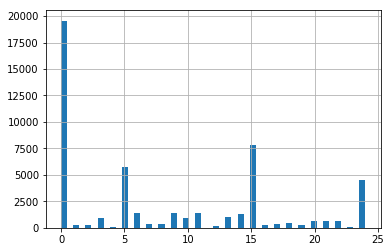

In [339]:
pd.Series(test_agent_actions).hist(bins=50)

### Train set

In [327]:
train_s, train_a = get_sa_seq(train)

In [341]:
train_a, train_agent_actions, train_physician_q, train_agent_q = predict((train_s, train_a))

Trying to load model...
INFO:tensorflow:Restoring parameters from ./dqn_test/2m/ckpt
Model restored


In [346]:
np.mean(train_physician_q), np.mean(train_agent_q)

(7.5419569, 8.2002687)

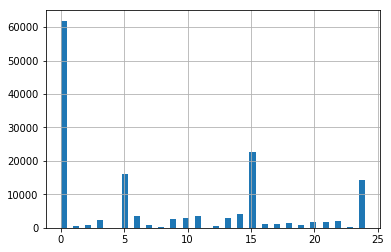

In [342]:
pd.Series(train_agent_actions).hist(bins=50)

In [347]:
pkl.dump(train_agent_actions, open('results/with_end_state/train_agent_actions_2m.pkl', 'wb'))
pkl.dump(test_agent_actions, open('results/with_end_state/test_agent_actions_2m.pkl', 'wb'))